In [1]:
#importing libraries
import pandas as pd 
import numpy as np

In [3]:
df=pd.read_csv(r"D:\SLDM- Sem3\_selectedreference_eBayAuctions.csv")

In [4]:
df.head(3)

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [5]:
print(df.shape)

(1972, 8)


In [6]:
#!pip install xlsxwriter

In [7]:
import xlsxwriter 

In [8]:
df.info

<bound method DataFrame.info of               Category currency  sellerRating  Duration endDay  ClosePrice  \
0     Music/Movie/Game       US          3249         5    Mon        0.01   
1     Music/Movie/Game       US          3249         5    Mon        0.01   
2     Music/Movie/Game       US          3249         5    Mon        0.01   
3     Music/Movie/Game       US          3249         5    Mon        0.01   
4     Music/Movie/Game       US          3249         5    Mon        0.01   
...                ...      ...           ...       ...    ...         ...   
1967        Automotive       US          2992         5    Sun      359.95   
1968        Automotive       US            21         5    Sat      610.00   
1969        Automotive       US          1400         5    Mon      549.00   
1970        Automotive       US            57         7    Fri      820.00   
1971        Automotive       US           145         7    Sat      999.00   

      OpenPrice  Competitive?  

<AxesSubplot:>

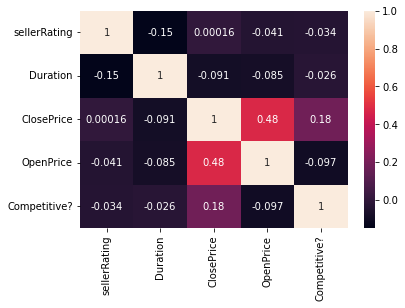

In [9]:
import seaborn as sns
ax = sns.heatmap(df.corr(), annot=True)
ax

##### Profit Percentage is most correlated with determining if the auction was competitive or not. If the auction is more competitive, the profit percentage increases and vice versa. The seller should focus on making the auction more competitive by focusing on the days where the competition is the most or on the duration that gives more profit

In [20]:
#A new Variable is added
#Profit Percentage = [(ClosePrice - OpenPrice) / ClosePrice] * 100

df["Profit Percentage"]=((df["ClosePrice"]-df["OpenPrice"]) / df["ClosePrice"])*100

df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?,Profit Percentage
0,13,2,3249,5,1,0.01,0.01,0,0.0
1,13,2,3249,5,1,0.01,0.01,0,0.0
2,13,2,3249,5,1,0.01,0.01,0,0.0
3,13,2,3249,5,1,0.01,0.01,0,0.0
4,13,2,3249,5,1,0.01,0.01,0,0.0


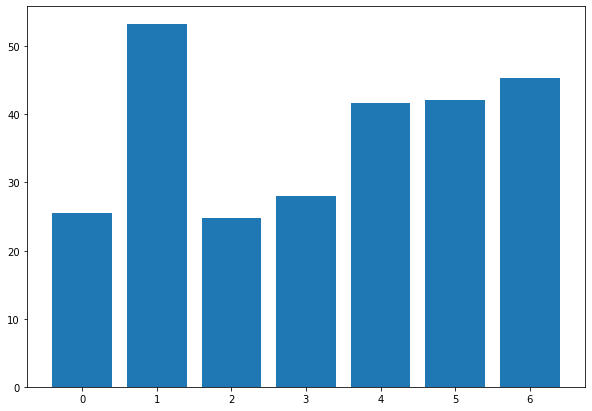

In [21]:
# Auction end day of the Week and Profit Percentage

df2=df[["endDay","Profit Percentage"]].groupby("endDay").mean().reset_index()
df2=df2.sort_values(by=["Profit Percentage"])

from matplotlib import pyplot as plt
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(df2["endDay"],df2["Profit Percentage"])
 
# Show Plot
plt.show()

##### An auction which closes on Monday are most profit.

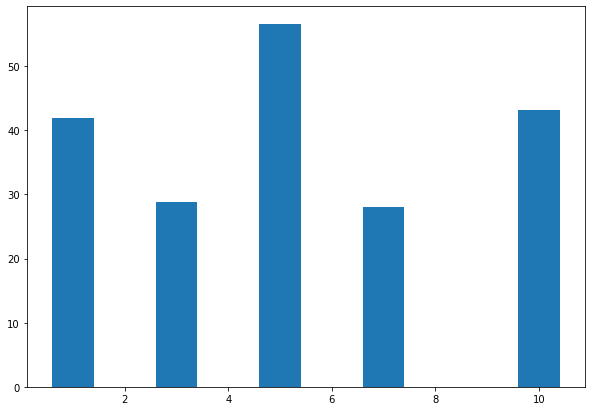

In [22]:
# Duration and Profit Percentage

df4=df[["Duration","Profit Percentage"]].groupby("Duration").mean().reset_index()
df4=df4.sort_values(by=["Profit Percentage"])

from matplotlib import pyplot as plt
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(df4["Duration"],df4["Profit Percentage"])
 
# Show Plot
plt.show()

###### An auction with duration of one day have more profit than auctions having duration of more than one day.

<Figure size 7200x720 with 0 Axes>

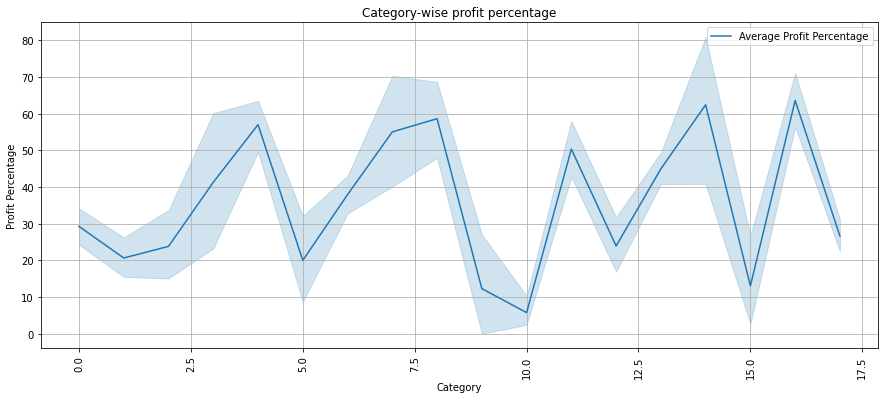

In [23]:
# Category and Average Profit Percentage

plt.figure(figsize=(100,10))

data2 =df.pivot_table(values="Profit Percentage", index="Category", aggfunc=np.average)

plt.figure(figsize=(15,6))
plt.title("Category-wise profit percentage")
sns.lineplot(x="Category", y="Profit Percentage", data =df, label = 'Average Profit Percentage')

plt.xticks(rotation = 90)
plt.grid(axis="x")
plt.grid(axis="y")

##### An auction with duration of one day have more profit than auctions having duration of more than one day.

<Figure size 7200x720 with 0 Axes>

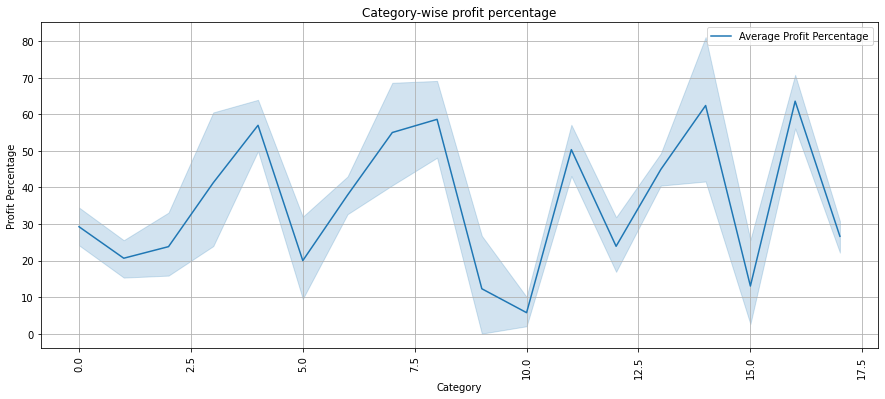

In [24]:
# Category and Average Profit Percentage

plt.figure(figsize=(100,10))

data2 =df.pivot_table(values="Profit Percentage", index="Category", aggfunc=np.average)

plt.figure(figsize=(15,6))
plt.title("Category-wise profit percentage")
sns.lineplot(x="Category", y="Profit Percentage", data =df, label = 'Average Profit Percentage')

plt.xticks(rotation = 90)
plt.grid(axis="x")
plt.grid(axis="y")


In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['currency'] = le.fit_transform(df['currency'])
df['endDay'] = le.fit_transform(df['endDay'])

# Model 1: Decision Tree classifier

In [27]:
y = df['Competitive?']
x = df[['sellerRating','Duration','ClosePrice','OpenPrice','currency','Category']]  

In [28]:
#dataframes to be numpy arrays
y = y.values
x = x.values

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
#splitting data 60% training 40% validation
test_percent = 0.40
seed = 11
shuffle_data = True
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,
                                                            random_state=1)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           1972 non-null   int64  
 1   currency           1972 non-null   int64  
 2   sellerRating       1972 non-null   int64  
 3   Duration           1972 non-null   int64  
 4   endDay             1972 non-null   int64  
 5   ClosePrice         1972 non-null   float64
 6   OpenPrice          1972 non-null   float64
 7   Competitive?       1972 non-null   int64  
 8   Profit Percentage  1972 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 138.8 KB


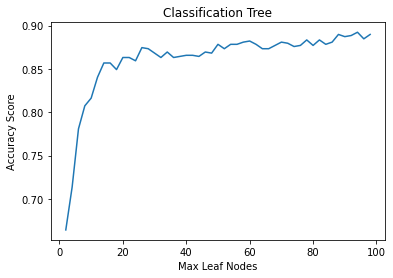

Best Accuracy Score: 0.892269
Best Max Leaf Nodes: 94.000000


In [33]:
# we want to optimize the max leaf nodes of our classification tree
leaf_values = np.arange(2, 100, 2)
scores = []
best_score = 0
best_leaf = 0
for l in leaf_values:
    clf = DecisionTreeClassifier(max_leaf_nodes=l)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_leaf = l
    
scores = np.array(scores)

# plot the results
plt.plot(leaf_values, scores)
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Accuracy Score")
plt.title("Classification Tree")
plt.show()

print("Best Accuracy Score: %f" % best_score)
print("Best Max Leaf Nodes: %f" % best_leaf)


In [34]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Confusion Matrix")
print("|   | 0  | 1  |")
print("---------------")
print("| 0 | %i | %i |" % (cm[0][0], cm[0][1]))
print("| 1 | %i | %i |" % (cm[1][0], cm[1][1]))

[[330  23]
 [ 64 372]]
Confusion Matrix
|   | 0  | 1  |
---------------
| 0 | 330 | 23 |
| 1 | 64 | 372 |


# Model 2: Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
# we want to optimize the n estimators of our Random Forest classifier
n_values = np.arange(40, 220, 10)  # a variety of ranges were tested but the optimal was in this region
scores = []
best_score = 0
best_n = 0
for n in n_values:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_n = n
    
scores = np.array(scores)


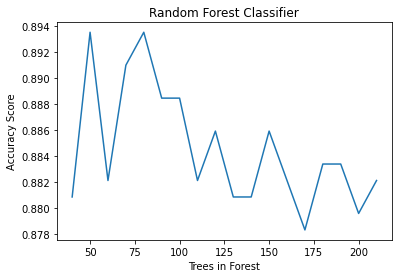

Best Accuracy Score: 0.893536
Best n Estimators:   50.000000


In [37]:
# plotting the results
plt.plot(n_values, scores)
plt.xlabel("Trees in Forest")
plt.ylabel("Accuracy Score")
plt.title("Random Forest Classifier")
plt.show()
print("Best Accuracy Score: %f" % best_score)
print("Best n Estimators:   %f" % best_n)

In [38]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Confusion Matrix")
print("|   | 0  | 1  |")
print("---------------")
print("| 0 | %i | %i |" % (cm[0][0], cm[0][1]))
print("| 1 | %i | %i |" % (cm[1][0], cm[1][1]))

[[330  23]
 [ 70 366]]
Confusion Matrix
|   | 0  | 1  |
---------------
| 0 | 330 | 23 |
| 1 | 70 | 366 |


# Comparison Between Model 1 and Model 2

In [39]:
model1= DecisionTreeClassifier(max_leaf_nodes=48).fit(x_train, y_train).predict_proba(x_test)
model2= RandomForestClassifier(n_estimators=40).fit(x_train, y_train).predict_proba(x_test)

C:\Users\HP\AppData\Local\Temp/ipykernel_26948/1852556382.py:4: RuntimeWarning: invalid value encountered in true_divide
  lift1 = t1/f1
C:\Users\HP\AppData\Local\Temp/ipykernel_26948/1852556382.py:5: RuntimeWarning: invalid value encountered in true_divide
  lift2 = t2/f2


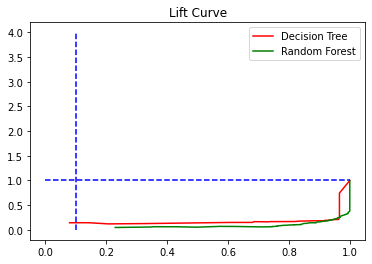

In [40]:
f1, t1, _ = roc_curve(y_test.ravel(), [i[0] for i in model1])
f2, t2, _ = roc_curve(y_test.ravel(), [i[0] for i in model2])

lift1 = t1/f1
lift2 = t2/f2

plt.plot(f1, lift1, color='red', label='Decision Tree')
plt.plot(f2, lift2, color='green', label='Random Forest')

plt.plot([0, 1], [1, 1], color='blue', linestyle='--')
plt.plot([0.1, 0.1], [0, 4], color='blue', linestyle='--')
plt.title("Lift Curve")
plt.legend()
plt.show()

# Model 3: Logistic Regression 

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                            random_state=1)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='Decision Threshold', ylabel='Values'>

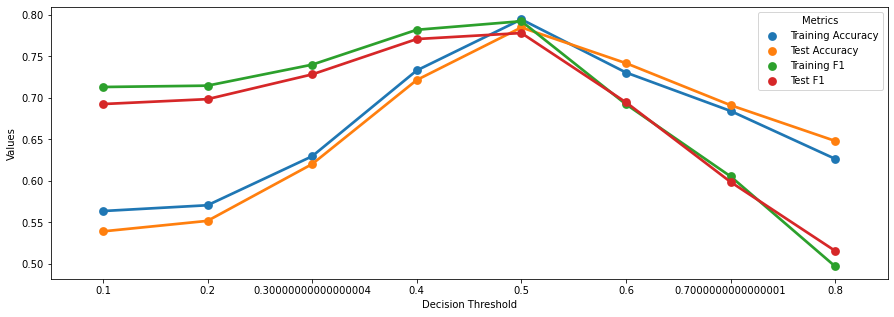

In [44]:
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []
#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(x_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(x_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(x_test)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int)
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [45]:
thresh = 0.5 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(x_test)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7848101265822784
Test F1 Score:  0.7780678851174936
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,161,26,187
1,59,149,208
All,220,175,395


In [46]:
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)
print(model.intercept_)
print(model.coef_)
print(model.predict_proba(x_test))
# Model accuracy on Train data
print("Model Score on Train set:",model.score(x_train, y_train))
# Model Accuracy on Test
print("Model Score on Train set:",model.score(x_test, y_test))


[-0.3317971]
[[-3.20231476e-05 -4.86218065e-02  1.05706348e-01 -1.31820367e-01
   2.05228140e-01  2.50808075e-02]]
[[7.46690578e-01 2.53309422e-01]
 [1.19312159e-01 8.80687841e-01]
 [5.66179532e-01 4.33820468e-01]
 [3.17447103e-01 6.82552897e-01]
 [4.70817273e-01 5.29182727e-01]
 [3.69084563e-01 6.30915437e-01]
 [3.74692297e-01 6.25307703e-01]
 [5.43353520e-01 4.56646480e-01]
 [3.88548178e-01 6.11451822e-01]
 [2.29539410e-09 9.99999998e-01]
 [5.21986458e-01 4.78013542e-01]
 [5.10409912e-01 4.89590088e-01]
 [5.34111448e-01 4.65888552e-01]
 [5.31795033e-01 4.68204967e-01]
 [5.70250721e-01 4.29749279e-01]
 [2.87578199e-01 7.12421801e-01]
 [4.73215349e-01 5.26784651e-01]
 [5.99768285e-01 4.00231715e-01]
 [5.58446096e-01 4.41553904e-01]
 [4.96202614e-02 9.50379739e-01]
 [5.50742208e-01 4.49257792e-01]
 [5.31795033e-01 4.68204967e-01]
 [6.05604665e-01 3.94395335e-01]
 [6.23978601e-01 3.76021399e-01]
 [5.77666164e-01 4.22333836e-01]
 [4.57134421e-01 5.42865579e-01]
 [2.76032877e-01 7.23967123

In [47]:
print("Classification Report:\n",classification_report(y_test, model.predict(x_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79       187
           1       0.85      0.72      0.78       208

    accuracy                           0.78       395
   macro avg       0.79      0.79      0.78       395
weighted avg       0.79      0.78      0.78       395



# Model 4: Gaussian Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [49]:
print("Naive Bayes score: ",nb.score(x_test,y_test))

Naive Bayes score:  0.5645569620253165


# Comparison between Model3 and Model4


C:\Users\HP\AppData\Local\Temp/ipykernel_26948/1195425287.py:6: RuntimeWarning: invalid value encountered in true_divide
  lift3 = t3/f3
C:\Users\HP\AppData\Local\Temp/ipykernel_26948/1195425287.py:7: RuntimeWarning: invalid value encountered in true_divide
  lift4 = t4/f4


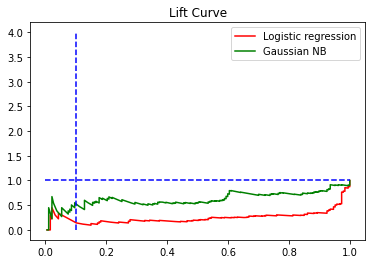

In [50]:
model3= LogisticRegression(solver='liblinear').fit(x_train, y_train).predict_proba(x_test)
model4= GaussianNB().fit(x_train, y_train).predict_proba(x_test)
f3, t3, _ = roc_curve(y_test.ravel(), [i[0] for i in model3])
f4, t4, _ = roc_curve(y_test.ravel(), [i[0] for i in model4])

lift3 = t3/f3
lift4 = t4/f4

plt.plot(f3, lift3, color='red', label='Logistic regression')
plt.plot(f4, lift4, color='green', label='Gaussian NB')

plt.plot([0, 1], [1, 1], color='blue', linestyle='--')
plt.plot([0.1, 0.1], [0, 4], color='blue', linestyle='--')
plt.title("Lift Curve")
plt.legend()
plt.show()

# Overall Result
##### The seller must focus on releasing 1 day auctions as they produce the most competitiveness and can bring in the most profit. length of the days (duration) the seller puts an item for sale has a correlation to the final price bidders are willing to pay.

##### Auctions closing on Mondays give most profit so seller can focus on durations that close on Mondays

##### Categories 'Sporting Goods' and 'Photography' give most profit while 'Healthcare and beauty' products give least profit and simultaneously have the least competition

##### Out of all models, Decision tree shows highest accuracy of 89% followed by Random forest and logistic regression and Gaussian shows the least with 56%